In [1]:
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pduino import lit_fichier

V, P = lit_fichier('mesures_P.csv')
print(V)
print(P)

[60.0, 55.0, 50.0, 45.0, 40.0, 35.0, 30.0, 25.0]
[1006.0555644250994, 1076.0782797939653, 1146.100995162831, 1244.1327966792428, 1349.1668697325413, 1468.2054858596125, 1615.2531881342304, 1811.3167911670541]


### Graphe $P = f(\frac{1}{V})$

In [2]:
# Calcul du modèle linéaire de la forme 𝑦 = m × 𝑥 + p
# V en m3
V = [v*1e-6 for v in V]

# P en Pa
P = [p*100 for p in P]

# calcul de 1/V
X = [1/v for v in V]

Modele = linregress(X, P) # calcul du modèle
a, b = Modele[0], Modele[1]

# calcul de la droite modélisée
P_th = [a * x + b for x in X]

# calcul des incertitudes de type B
U_V = [1e-6 for v in V]
U_P = [p*0.03 for p in P]                       # uP = 1;5% P
U_invV = [1/v**2 * uv for v,uv in zip(V,U_V)]    # u(1/V) = 1/V**2 * uV                         
print(U_P)

[3018.1666932752983, 3228.234839381896, 3438.3029854884926, 3732.398390037728, 4047.500609197624, 4404.616457578837, 4845.7595644026915, 5433.950373501162]


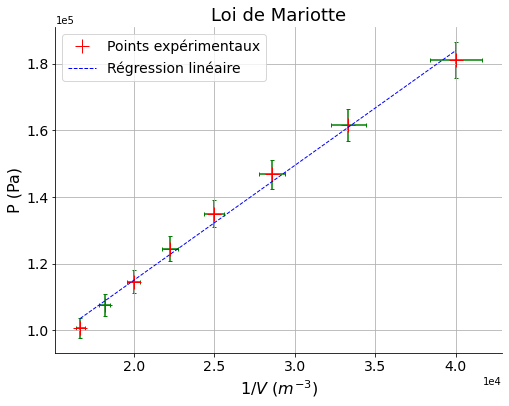

In [3]:
# Paramétrage du graphique et choix des grandeurs placées en abscisse et en ordonnée
plt.figure('Loi de Mariotte',figsize=(8, 6))# Initialise la figure
plt.title('Loi de Mariotte',fontsize = 18)  # Titre du graphe
plt.xlabel('$1/V~(m^{-3})$',fontsize = 16)             # Label de l’axe des abscisses
plt.ylabel('P (Pa)',fontsize = 16)         # Label de l’axe des ordonnées
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xticks(fontsize=14)
plt.ticklabel_format(axis='x',style='scientific',scilimits=(-1,2))
plt.ticklabel_format(axis='y',style='scientific',scilimits=(-1,2))
plt.yticks(fontsize=14)
plt.plot(X, P,'r+',ms=14,label='Points expérimentaux')     # Points expérimentaux
plt.plot(X, P_th,'b--',label='Régression linéaire',lw=1)   # Modélisation
plt.errorbar(X, P, xerr = U_invV, yerr = U_P, fmt = 'none', capsize = 2, ecolor = 'green', zorder = 1)
plt.grid()                                            
plt.legend(fontsize=14)
plt.show()

### Graphe $P = f(V)$

In [4]:
def fonct_ajust(V, a, b):
    return a * 1/V + b 

popt, pcov = curve_fit(fonct_ajust, np.array(V), np.array(P))
# popt
print(popt)

[3.44620616e+00 4.60861850e+04]


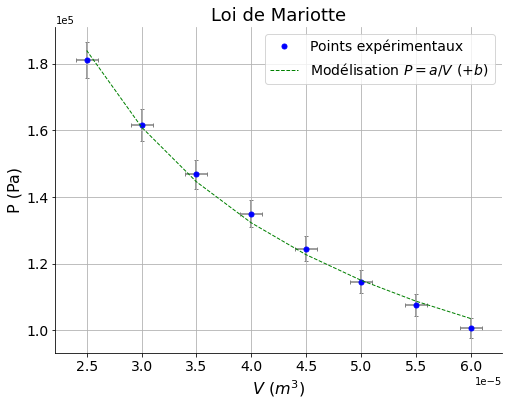

In [5]:
# Paramétrage du graphique et choix des grandeurs placées en abscisse et en ordonnée
plt.figure('Loi de Mariotte',figsize=(8, 6))# Initialise la figure
plt.title('Loi de Mariotte',fontsize = 18)  # Titre du graphe
plt.xlabel('$V~(m^3)$',fontsize = 16)             # Label de l’axe des abscisses
plt.ylabel('P (Pa)',fontsize = 16)         # Label de l’axe des ordonnées
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xticks(fontsize=14)
plt.ticklabel_format(axis='x',style='scientific',scilimits=(-1,2))
plt.ticklabel_format(axis='y',style='scientific',scilimits=(-1,2))
plt.yticks(fontsize=14)
plt.plot(V, P, ms=5, label='Points expérimentaux', linestyle='', marker='o', color='blue')
plt.plot(V, [popt[0]/v+popt[1] for v in V],'g--',label='Modélisation $P=a/V~(+ b)$ ',lw=1)
plt.errorbar(V, P, xerr = U_V, yerr = U_P, fmt = 'none', capsize = 2, ecolor = 'gray', zorder = 1)
plt.grid()  
plt.legend(fontsize=14)
plt.show()